

# Eigen Portfolio

One of the applications of PCA involves the covariance matrix of the normalized returns. The principal components of the correlation matrix capture most of the covariation among assets in descending order and are mutually uncorrelated. Moreover, we can use standardized the principal components as portfolio weights.

In this case study, we perform automatized unsupervised machine learning Principal Component Analysis (PCA) on the Dow Jones Industrial Average index and it's respective 30 stocks to construct an optimized diversified intelligent portfolio.

Things to focus on in this case study: 

* Using PCA and the to identify a profitable stocks or portfolio.
* Understand eigenvalues and eigenvectors of PCA and deriving the portfolio weight using the principal components.
* Backtesting Framework for the Portfolio Performance: Computing and analysing Sharp Ratio and Annualised Return of the portfolio
* Cross check which is the best performer out of all the eigen portfolio available. 
* The idea of the eigen portfolio is also to come up with independent eigen portfolios and can lead to more diversification.


## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train Test Split](#4.1)
    * [5.2. Model Evaluation- Applying Principle Component Analysis](#4.2)
        * [5.2.1. Explained Variance using PCA](#4.2.1)
        * [5.2.2. Finding the Best Eigen Portfolio](#4.2.2)
        * [5.2.3. Backtesting Eigenportfolio](#4.2.3)

<a id='0'></a>
# 1. Introduction

Our goal in this jupyter notebook is to understand how to work through a dimensionality reduction models problem end-to-end. This notebook is applicable for all kinds of dimensionity reduction problems.


We import the pandas dataframe containing all the adjusted closing prices for all the companies in the DJIA as well as the DJIA's index. Because our starting date was the year 2000, the adjusted closing prices for Dow Chemicals and Visa appear as Not a Number values. For this we will take away both respective columns. We will end up with 28 columns of companies information and an additional one for the DJIA index.

We use the metrices of the portfolio performance defined below:

Sharpe Ratio: The sharpe ratio explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and lower volatility for the specified portfolio.

Annualized Returns: We have to apply the geometric average of all the returns in respect to the periods per year (days of operations in the exchange in a year).

Annualized Volatility: We have to take the standard deviation of the returns and multiply it by the square root of the periods per year.
Annualized Sharpe: we compute the ratio by dividing the annualized returns against the annualized volatility.
Optimized Portfolio

We compute an iterable loop to compute the principle component's weights for each Eigen Portfolio, which then uses the sharpe ratio function to look for the portfolio with the highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we can visualize its performance against the DJIA Index to understand how it outperforms it.


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [189]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [190]:
# load dataset
dataset = read_csv('Dow_adjcloses.csv',index_col=0)

In [191]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [192]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [193]:
# shape
dataset.shape

(4804, 30)

In [194]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,NaN,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,NaN,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,NaN,...,4.702,16.416,31.326,20.086,20.255,5.753,22.564,NaN,44.503,21.097
2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,NaN,...,4.678,16.973,32.438,20.122,20.998,5.964,22.449,NaN,45.127,20.527
2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,NaN,...,4.678,18.123,35.024,20.922,21.831,6.663,22.283,NaN,48.535,21.052


In [195]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [196]:
# describe data
set_option('precision', 3)
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,363.000,...,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,2741.000,4804.000,4804.000
mean,86.769,49.659,49.107,85.482,56.697,61.735,21.653,24.984,46.368,64.897,...,23.724,20.737,49.960,55.961,62.209,64.418,27.193,53.323,50.767,41.697
std,53.942,22.564,55.020,79.085,34.663,31.714,10.074,10.611,32.733,5.768,...,20.988,7.630,19.769,34.644,32.627,62.920,11.973,37.647,17.040,19.937
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,49.090,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,51.192,34.079,3.900,37.407,26.335,31.820,14.910,15.420,22.044,62.250,...,8.037,15.031,35.414,29.907,34.328,23.498,17.434,18.959,38.062,27.704
50%,63.514,42.274,23.316,58.437,53.048,56.942,18.578,20.563,29.521,66.586,...,14.147,18.643,46.735,39.824,55.715,42.924,21.556,45.207,42.782,32.706
75%,122.906,66.816,84.007,112.996,76.488,91.688,24.650,34.927,75.833,69.143,...,36.545,25.403,68.135,80.767,92.557,73.171,38.996,76.966,65.076,58.165
max,251.981,112.421,231.260,411.110,166.832,128.680,63.698,50.400,117.973,75.261,...,85.300,45.841,98.030,146.564,141.280,286.330,60.016,150.525,107.010,90.188


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

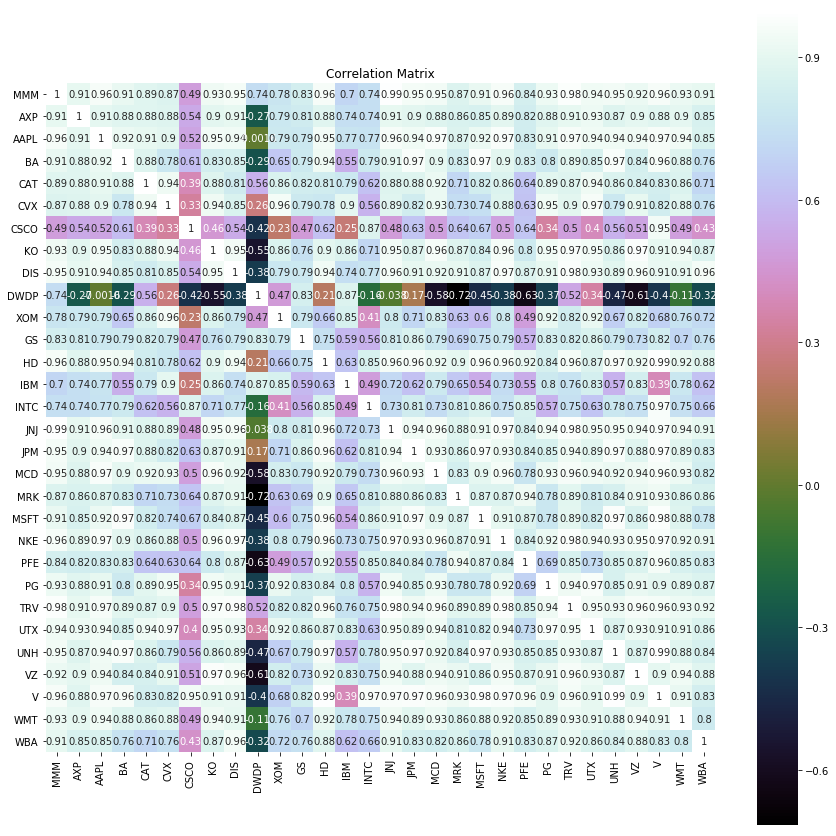

In [197]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [198]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [199]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

Given that there are null values drop the rown contianing the null values.

In [200]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.65,14.561,21.582,43.004,16.984,23.522,23.862,...,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.61,14.372,21.582,40.577,17.041,24.900,23.405,...,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907


Computing Daily Return

In [201]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

<a id='3.2'></a>
## 4.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-2.784,-1.715,-3.315,-0.119,-0.672,-0.030,-2.305,0.237,3.089,-1.283,...,-1.775,-2.928,-2.411,-1.505,-0.764,-2.480,-0.699,-2.098,-2.507,-2.168
2000-01-05,3.492,-0.251,0.523,3.667,1.829,1.322,0.305,0.824,1.857,3.248,...,0.528,3.024,1.148,-0.672,0.511,-0.589,-0.164,2.128,-1.569,0.502


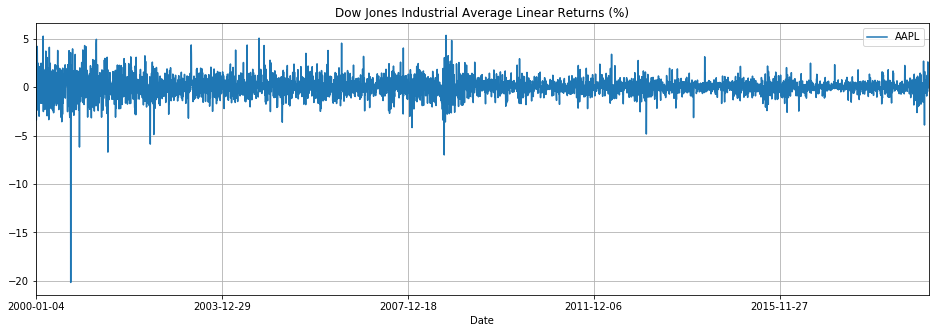

In [203]:
# Visualizing Log Returns for the DJIA 
plt.figure(figsize=(16, 5))
plt.title("Dow Jones Industrial Average Linear Returns (%)")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

The portfolio is divided into train and test split to perform the analysis regarding the best porfolio and backtesting shown later. 

In [204]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

<a id='4.2'></a>
## 5.2. Model Evaluation- Applying Principle Component Analysis

As the next step We create a function to compute Principle Component Analysis from Sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

In [205]:
pca = PCA()
PrincipalComponent=pca.fit_transform(X_train)

We find that the most important factor explains around 30% of the daily return variation. The dominant factor is usually interpreted as ‘the market’, whereas the remaining factors can be interpreted as industry or style factors in line with our discussion in chapters 5 and 7, depending on the results of closer inspection (see next example). 

The plot on the right shows the cumulative explained variance and indicates that around 10 factors explain 60% of the returns of this large cross-section of stocks.  

### First Principal Component /Eigenvector

In [206]:
PrincipalComponent[:, 0]

array([-8.85428363,  5.83078277,  1.91658402, ...,  1.33643271,
       -1.42982965,  0.78774638])

<a id='4.2.1'></a>
## 5.2.1.Explained Variance using PCA

,Explained Variance_Top 5
0,39.99%
1,46.96%
2,50.93%
3,54.82%
4,58.13%
5,61.01%
6,63.79%
7,66.40%
8,68.92%
9,71.25%


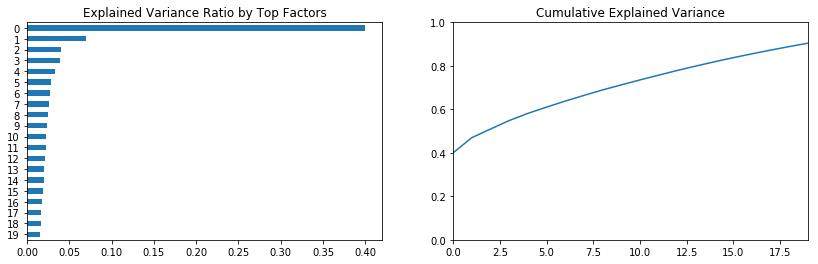

In [207]:
NumEigenvalues=20
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)


### Portfolio Weight 

We compute several functions to determine the weights of each principle component. We then visualize a scatterplot that visualizes an organized descending plot with the respective weight of every company at the current chosen principle component.

In [208]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[:, i] / sum(pca.components_[:, i])

    weights = weights.values.T
    return weights

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA8112F5C0>],
      dtype=object)

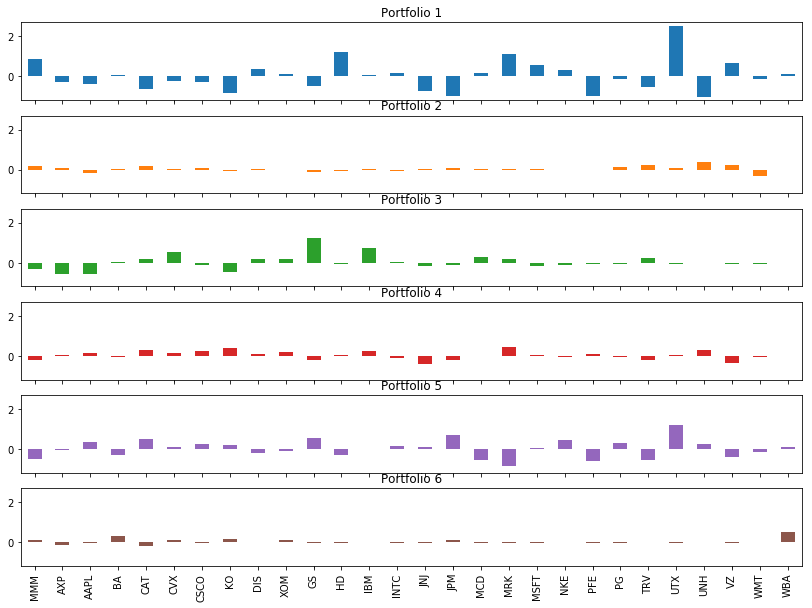

In [209]:
weights = PCWeights()
NumComponents=6    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range(1, NumComponents+1)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True)

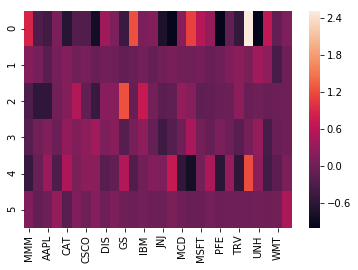

In [210]:
# plotting heatmap 
sns.heatmap(topPortfolios) 

<a id='4.2.2'></a>
## 5.2.2. Finding the Best Eigen Portfolio

The sharpe ratio explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and lower volatility for the specified portfolio.

Annualized Returns: We have to apply the geometric average of all the returns in respect to the periods per year (days of operations in the exchange in a year).

Annualized Volatility: We have to take the standard deviation of the returns and multiply it by the square root of the periods per year.

Annualized Sharpe: we compute the ratio by dividing the annualized returns against the annualized volatility.

In [211]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

We compute an iterable loop to compute the principle component's weights for each Eigen Portfolio, which then uses the sharpe ratio function to look for the portfolio with the highest sharpe ratio. Once we know which portfolio has the highest sharpe ratio, we can visualize its performance against the DJIA Index to understand how it outperforms it.

Eigen portfolio #12 with the highest Sharpe. Return 133.22%, vol = 84.62%, Sharpe = 1.57
    Return    Vol  Sharpe
12   1.332  0.846   1.574
20   0.517  0.577   0.895
1    0.551  0.618   0.891
27   0.855  1.074   0.796
8    0.442  0.588   0.752
25   0.618  0.943   0.655
6    0.383  0.668   0.573
15   0.277  0.584   0.474
11   0.487  1.089   0.447
18   0.236  0.581   0.407
17   0.349  0.862   0.405
3    0.305  0.777   0.392
10   0.071  0.693   0.102
5    0.059  0.630   0.093
21   0.121  1.444   0.084
13   0.042  0.581   0.073
16  -0.035  0.994  -0.035
22  -0.106  1.047  -0.101
23  -0.157  0.699  -0.224
14  -0.189  0.731  -0.258


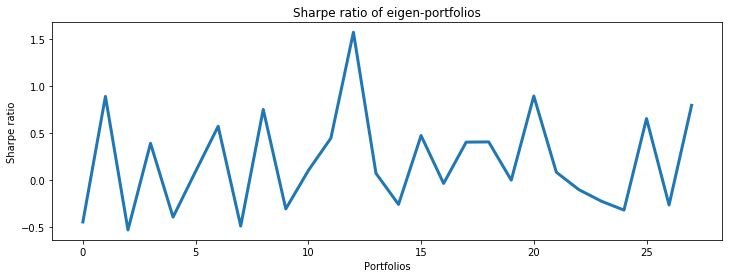

In [219]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[:, i] / sum(pcs[:, i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        
        eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen_prtfi / n_portfolios)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

As shown from the results above, the portfolio 12 is the best portfolio and has the maximum sharp ratio out of all the porfolio. Let us look at the composition of this portfolio. 

Sum of weights of current eigen-portfolio: 100.00


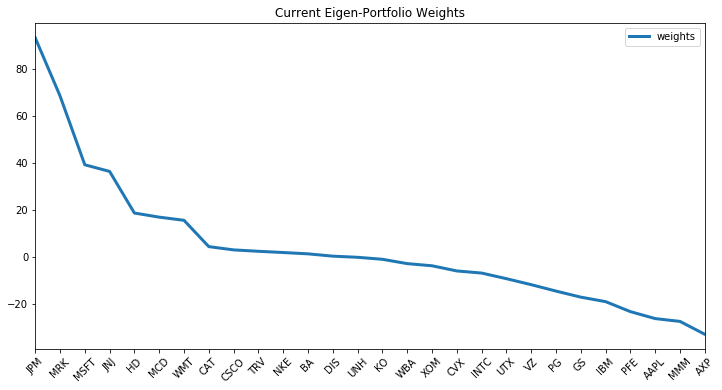

,weights
JPM,93.398
MRK,68.658
MSFT,39.279
JNJ,36.445
HD,18.710
MCD,16.959
WMT,15.614
CAT,4.395
CSCO,3.008
TRV,2.406


In [213]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[12], plot=True)

The chart shows the allocation of the best portfolio. The best portfolio has a long 93% JPM and short -33% AXP. 

<a id='4.2.3'></a>
## 5.2.3. Backtesting Eigenportfolio

We will now try to backtest this algorithm by training on the first 8 years of historical data and then testing it on the test set.

Eigen-Portfolio:
Return = 133.22%
Volatility = 84.62%
Sharpe = 1.57


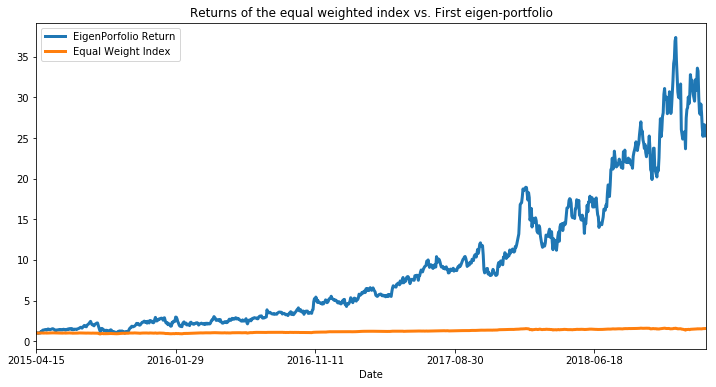

Eigen-Portfolio:
Return = 51.66%
Volatility = 57.69%
Sharpe = 0.90


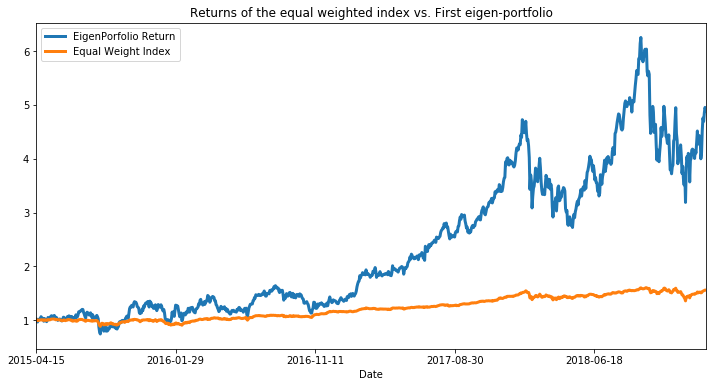

Eigen-Portfolio:
Return = -18.88%
Volatility = 73.14%
Sharpe = -0.26


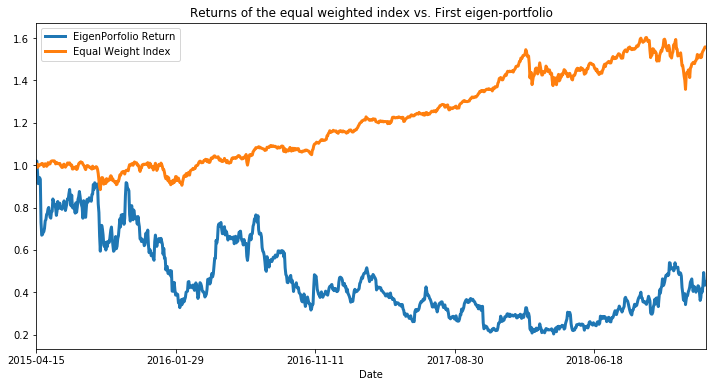

In [223]:
def Bactest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''

    eigen_portfolio_returns = np.dot(X_test_raw.loc[:, eigen.index], eigen / len(pca.components_))
    eigen_portfolio_returns = pd.Series(eigen_portfolio_returns.squeeze(), index=X_test.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    print('Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    #print(eigen_portfolio_returns)
    #year_frac = (eigen_portfolio_returns.index[-1] - eigen_portfolio_returns.index[0]).days / 252
    
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. First eigen-portfolio', 
                          figsize=(12,6), linewidth=3)
    plt.show()

Bactest(eigen=plotEigen(weights=weights[12]))
Bactest(eigen=plotEigen(weights=weights[20]))
Bactest(eigen=plotEigen(weights=weights[14]))

As shown in chart above the eigen portfolio return of the 1st and 2nd porfolio outperform the equally weighted portfolio in the test set, and performance of the eigen portfolio ranked 20 underperform the market significantly.

__Conclusion__

* Eigenvalues and eigenvectors of PCA can be used to derive the portfolio weights 

* Using PCA, we get independent eigen portfolios with higher return and sharp ratio as compared to market. 

* Portfolio Performance framework enables us to compute and analyse the Sharp Ratio and Annualised Return of the portfolio and helps in the cross checking which is the best performer out of all the eigen portfolio available. 

* Looking at the backtesting result, the portfolio with the best result in the training set leads to the best result in the test set. 

